1. Estimate the channel capacity of plain old (wired) telephone service.

The Shannon capacity is $$ C = B\log_2(1+SNR) $$

The frequency spectrum of the human voice is from 300 to 3400 Hz and the typical SNR is 45dB according to https://www.jkaudio.com/article_03.htm 

In [3]:
import numpy as np

B = 3.1e3                       # Bandwidth in Hz   
SNR_dB = 45                     # signal to noise ratio in dB
SNR_linear = 10**(SNR_dB/10)    # linear conversion of SNR
C = B * np.log2(1 + SNR_linear) # Shannon capacity
print("The Shannon capacity is: ", C, "bits/s")

The Shannon capacity is:  46341.03834971382 bits/s


Using the point scatterer multipath propagation model from an earlier homework assignment,

(a) plot the SNR as a function of time for a moving receiver using spatial diversity with a simple selection algorithm, for isotropic radiator arrays of M = 1, 2, and 3 elements. 

(b) Plot the SNR CDFs with the analytical CDFs superimposed. 

(c) Plot the average SNR versus number of elements with the analytical result superimposed. 

(d) What happens if the array elements are very close together?

Text(0, 0.5, 'SNR (dB)')

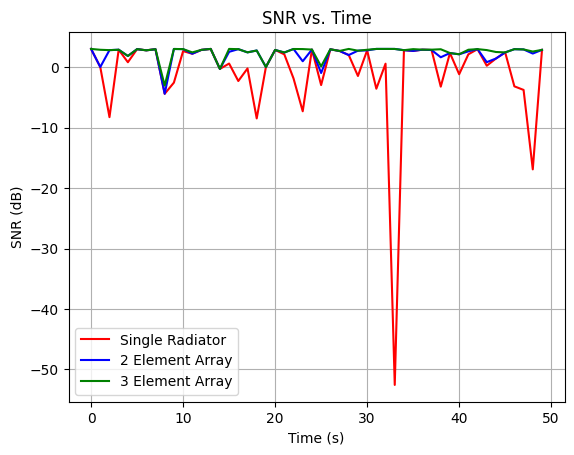

In [ ]:
# Scatterer multipath propagation model

import numpy as np
import matplotlib.pyplot as plt

# variables
points = 50
bins = 200

# parameters
f = 1e9
c0 = 3e8
lam = c0/f
k = 2*np.pi/lam
eta = 377
Gr = 10**(1/10)

# transmitter location
x_t = 0
y_t = 0

# locations for receiver
x_r = np.linspace(-10, 10, points)
y_r = np.zeros(points)

# scatter points
x_s = np.random.uniform(-10, 10, points)
y_s = np.random.uniform(-10, 10, points)

# receiver model
M = [1, 2, 3]                                       # number of elements
E_single = np.zeros([points, M[0]], dtype=complex)  # single radiator received field
E_double = np.zeros([points, M[1]], dtype=complex)  # received field
E_triple = np.zeros([points, M[2]], dtype=complex)  # received field
x_r_e = [0, lam/2, lam]                             # element positions within the array
ref_coef = -1                                       # reflection coefficient
selected_snrs_double = []                           # maximum SNRs
selected_snrs_triple = []                           # maximum SNRs

# Noise power
k_B = 1.38e-23  # Boltzmann constant
T0 = 290        # Noise temperature
B = 1e6         # Bandwidth
N_0 = k_B*T0*B  # Noise power

# (a) plot the SNR as a function of time for a moving receiver 
# using spatial diversity with a simple selection algorithm, 
# for isotropic radiator arrays of M = 1, 2, and 3 elements.  

for m in range(0,points):

    # single element
    delta_r = np.sqrt((x_t-x_s[m])**2+(y_t-y_s[m])**2) - np.sqrt((x_s[m]-(x_r[m]))**2+(y_s[m]-y_r[m])**2)
    E_single[m] = 1+ref_coef*np.exp(-1j*k*delta_r)
    
    # two element array
    for n in range(0,M[1]):
        # distance between scatterer and receiver
        delta_r = np.sqrt((x_t-x_s[m])**2+(y_t-y_s[m])**2) - np.sqrt((x_s[m]-(x_r[m]+x_r_e[n]))**2+(y_s[m]-y_r[m])**2) 
        # received field
        E_double[m][n] = 1+ref_coef*np.exp(-1j*k*delta_r)
    # select the maximum signal
    E_double[m] = np.abs(E_double[m])
    selected_snrs_double.append(np.max(E_double[m], axis=0)) # Max SNR

    # three element array
    for n in range(0,M[2]):
        # distance between scatterer and receiver
        delta_r = np.sqrt((x_t-x_s[m])**2+(y_t-y_s[m])**2) - np.sqrt((x_s[m]-(x_r[m]+x_r_e[n]))**2+(y_s[m]-y_r[m])**2) 
        # received field
        E_triple[m][n] = 1+ref_coef*np.exp(-1j*k*delta_r)
    # select the maximum signal
    E_triple[m] = np.abs(E_triple[m])
    selected_snrs_triple.append(np.max(E_triple[m], axis=0)) # Max SNR

# plot the SNR as a function of time
plt.plot(np.arange(points), 10*np.log10(E_single), 'r-', label='Single Radiator')
plt.plot(np.arange(points), 10*np.log10(selected_snrs_double), 'b-', label='2 Element Array')
plt.plot(np.arange(points), 10*np.log10(selected_snrs_triple), 'g-', label='3 Element Array')
plt.grid()
plt.legend()
plt.title('Power Received vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Power (dB)')

[0.14645385 0.53770257 0.65156344 0.70372477 0.70382295 0.82835943
 0.84840018 0.90245514 0.92244797 0.9404411  0.95183718 0.95972442
 0.96478303 0.9664656  0.97052685 0.97470237 0.97534796 0.97566034
 0.97920741 0.98199157 0.98400354 0.98420449 0.98532206 0.98618273
 0.98677104 0.98698179 0.98757053 0.98775326 0.98826063 0.98852929
 0.98876007 0.98884928 0.98932729 0.98950947 0.98990554 0.99038041
 0.99082077 0.99108597 0.99121131 0.99128813 0.9913281  0.99135005
 0.99142681 0.99177416 0.99183637 0.9919303  0.99198234 0.99198901
 0.99200469 0.99200922]


Text(0, 0.5, 'CDF')

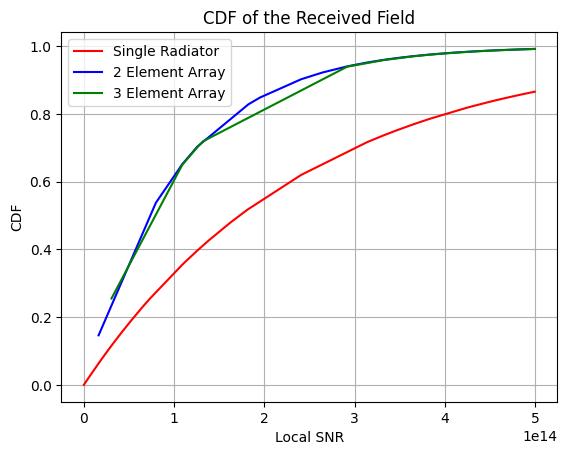

In [ ]:
# (b) Plot the SNR CDFs with the analytical CDFs superimposed. 
# CDF calculations

# CDF for single element
r_single = np.abs(E_single)
gamma_single = (r_single**2/2)/N_0
gamma_single = np.sort(gamma_single, axis=0) # sort the values
Gamma_Single = np.var(E_single)/N_0
F_single = 1-np.exp(-gamma_single/Gamma_Single) # CDF

# CDF for double element
r_double = np.abs(selected_snrs_double) # average of the two elements
gamma_double = (r_double**2/2)/N_0
gamma_double = np.sort(gamma_double, axis=0) # sort the values
Gamma_Double = np.var(E_double)/N_0
F_double = 1-np.exp(-gamma_double/Gamma_Double) # CDF 

# CDF for triple element
r_triple = np.abs(selected_snrs_triple)
gamma_triple = (r_triple**2/2)/N_0
gamma_triple = np.sort(gamma_triple, axis=0) # sort the values
Gamma_Triple = np.var(E_triple)/N_0
F_triple = 1-np.exp(-gamma_triple/Gamma_Triple) # CDF

# plot the CDF
plt.plot(gamma_single, F_single, 'r-', label='Single Radiator')
plt.plot(gamma_double, F_double, 'b-', label='2 Element Array')
plt.plot(gamma_triple, F_triple, 'g-', label='3 Element Array')
plt.grid()
plt.legend()
plt.title('CDF of the Received Field')
plt.xlabel('Local SNR')
plt.ylabel('CDF')